### Employee Attrition Data Analysis and ML Models Project Notebook & Report
Owen Randolph, 10/26/2024, DSCI-590: Applied Data Science

Data Description: The dataset was originally published by IBM sometime before 2017, providing fictional data from an HR department of a medical biotechnology company and was created by IBM data scientists.  It can also be found on Kaggle: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset along with a guide to the categorical data.

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

#### Load and Prepare Data

In [187]:
# Read in the recruitment data
data = pd.read_csv("recruitment_evaluation_data.csv")

In [188]:
data.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,SalesRating,HireSource,Campus
0,1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,8,0,1,6,4,0,5,1.08819,Applied Online,NaN
1,2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,...,10,3,3,10,7,1,7,NaN,NaN,NaN
2,3,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,7,3,3,0,0,0,0,NaN,Campus,Tech
3,4,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,...,8,3,3,8,7,3,0,NaN,NaN,NaN
4,5,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,...,6,3,3,2,2,2,2,NaN,Referral,NaN


In [189]:
# Check the number of rows and columns of the dataset
data.shape

(1470, 36)

In [190]:
# Check the data types in columns
data.dtypes

Unnamed: 0                    int64
Age                           int64
Attrition                     int64
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear       

In [191]:
# Display summary statistics
data.describe()

,Unnamed: 0,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,SalesRating
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,446.000000
mean,735.500000,36.923810,0.161224,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,...,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,1.082607
std,424.496761,9.135373,0.367863,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,...,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.710042
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.710827
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.584444
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,1.070143
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,...,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,1.532488
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,...,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,3.666740


For the sake of clarity and simplicity, and we will only use MonthlyIncome as a measure of salary, and so will drop DailyRate, MonthlyRate & HourlyRate.  The Education feature is not clear enough and will be dropped, along with "Unnamed: 0" and "Employee Number", which as not useful for our analysis.

In [192]:
# Prep column names for dropping columns
data.columns = data.columns.str.strip()

In [193]:
# drop columns
data = data.drop(columns=['Unnamed: 0', 'StandardHours', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate', 'DailyRate', 'Education'], errors='ignore')

In [194]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,SalesRating,HireSource,Campus
0,41,1,Travel_Rarely,Sales,1,Life Sciences,2,Female,3,2,...,8,0,1,6,4,0,5,1.08819,Applied Online,NaN
1,49,0,Travel_Frequently,Research & Development,8,Life Sciences,3,Male,2,2,...,10,3,3,10,7,1,7,NaN,NaN,NaN
2,37,1,Travel_Rarely,Research & Development,2,Other,4,Male,2,1,...,7,3,3,0,0,0,0,NaN,Campus,Tech
3,33,0,Travel_Frequently,Research & Development,3,Life Sciences,4,Female,3,1,...,8,3,3,8,7,3,0,NaN,NaN,NaN
4,27,0,Travel_Rarely,Research & Development,2,Medical,1,Male,3,1,...,6,3,3,2,2,2,2,NaN,Referral,NaN


In [195]:
# Check for missing values
data.isnull().sum()

Age                            0
Attrition                      0
BusinessTravel                 0
Department                     0
DistanceFromHome               0
EducationField                 0
EnvironmentSatisfaction        0
Gender                         0
JobInvolvement                 0
JobLevel                       0
JobRole                        0
JobSatisfaction                0
MonthlyIncome                  0
NumCompaniesWorked             0
OverTime                       0
PercentSalaryHike              0
PerformanceRating              0
RelationshipSatisfaction       0
StockOptionLevel               0
TotalWorkingYears              0
TrainingTimesLastYear          0
WorkLifeBalance                0
YearsAtCompany                 0
YearsInCurrentRole             0
YearsSinceLastPromotion        0
YearsWithCurrManager           0
SalesRating                 1024
HireSource                   618
Campus                      1202
dtype: int64

Upon inspection, we see that Sales Ratings are only for salespeople, so this is systematic missingness. The Campus column only indicates certain types of schools, with missing data for employees with unspecified campuses or possibly no college.  Hire Source contains significant missing data, likely Missing Completely at Random, as the missingness does not look to be related to the data itself. For the purpose of this analysis, we will drop these categories.

In [196]:
data = data.drop(columns=['SalesRating', 'HireSource', 'Campus'])

### Exploratory Data Analysis

We will create some basic plots to visualize the data, specifically related to Attrition, and look for correlation patterns.

In [197]:
attrition_counts = data['Attrition'].value_counts()
attrition_counts

Attrition
0    1233
1     237
Name: count, dtype: int64

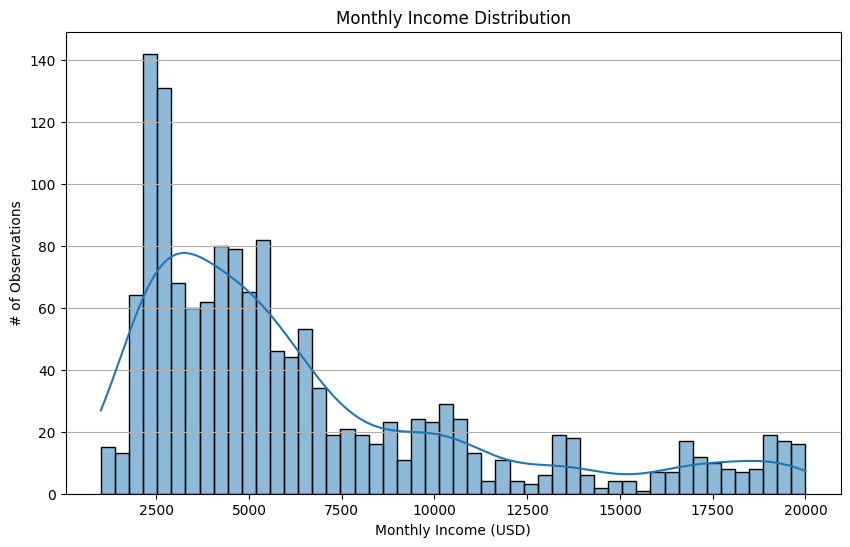

In [198]:
# Histogram for Monthly Income Distribution 
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='MonthlyIncome', bins = 50, kde=True)
plt.title("Monthly Income Distribution")
plt.xlabel("Monthly Income (USD)")
plt.ylabel("# of Observations")
plt.grid(axis='y')

plt.show()

C:\Users\orand\AppData\Local\Temp\ipykernel_55428\3920570647.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='MonthlyIncome', data=data, palette='coolwarm', order=[0,1])


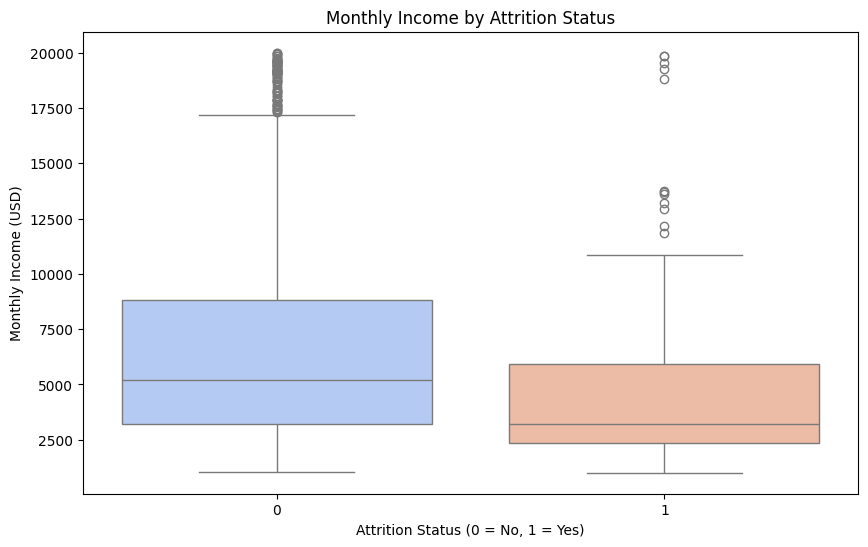

In [199]:
# Box plots for Monthly Income based on Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data, palette='coolwarm', order=[0,1])

# Add titles and labels
plt.title("Monthly Income by Attrition Status")
plt.xlabel("Attrition Status (0 = No, 1 = Yes)")
plt.ylabel("Monthly Income (USD)")

# Show the plot
plt.show()

People who left the company had lower average monthly income that those who have not left the company.  There are outliers in the upper extreme of the attrition dataset, and there are many outliers among the highest salaries in the no attrition cases.  However, these so not need to be removed from the data for further analysis, as they are not errors, but simply features.  These indicate right/positive skewed datasets. 

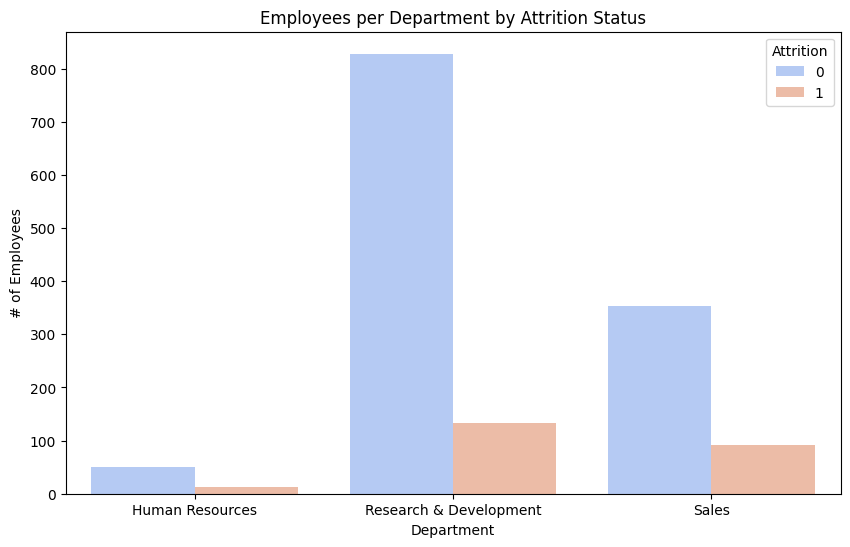

In [200]:
# Bar Chart of numbers of employees per department divided by attrition status
dept_attrition_counts = data.groupby(['Department', 'Attrition']).size().reset_index(name='Counts')

# Create the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='Counts', hue='Attrition', data=dept_attrition_counts, palette='coolwarm')

# Customize the plot
plt.title("Employees per Department by Attrition Status")
plt.xlabel("Department")
plt.ylabel("# of Employees")
plt.xticks(rotation=0)

plt.show()

In [201]:
for department in data['Department'].unique():
    # Filter data by department
    department_data = data[data['Department'] == department]
    
    # Count occurrences of Attrition values (1 and 0)
    attrition_counts = department_data['Attrition'].value_counts()

    # Count total Employees per dept
    total_employees = len(department_data)

    attrition_proportions = {
        'Attrition = 1': attrition_counts.get(1, 0) / total_employees,
        'Attrition = 0': attrition_counts.get(0, 0) / total_employees
    }
    
    print(f"Department: {department}")
    print(f"  Proportion of Attrition = 1: {attrition_proportions['Attrition = 1']:.2f}")
    print(f"  Proportion of Attrition = 0: {attrition_proportions['Attrition = 0']:.2f}")

Department: Sales
  Proportion of Attrition = 1: 0.21
  Proportion of Attrition = 0: 0.79
Department: Research & Development
  Proportion of Attrition = 1: 0.14
  Proportion of Attrition = 0: 0.86
Department: Human Resources
  Proportion of Attrition = 1: 0.19
  Proportion of Attrition = 0: 0.81


The department with the highest rate is sales, followed by HR, and then R&D.

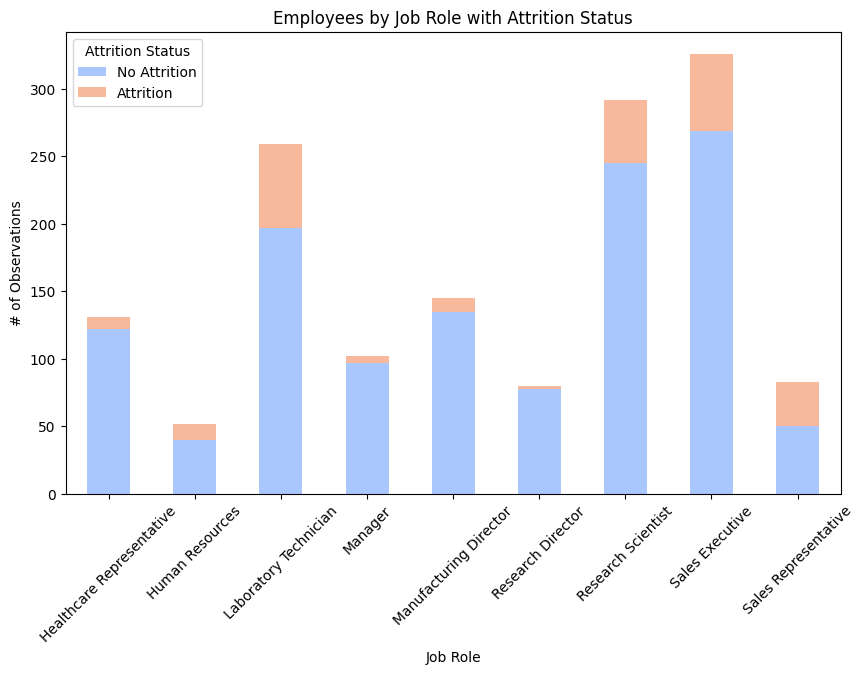

In [202]:
# Bar Chart of the distribution of jobs by title
job_role_attrition = data.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)

# Use palette from previous charts:
coolwarm = sns.color_palette("coolwarm", n_colors=2)

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
job_role_attrition.plot(kind='bar', stacked=True, ax=ax, color=coolwarm)

# Set titles and labels
ax.set_title("Employees by Job Role with Attrition Status")
ax.set_xlabel("Job Role")
ax.set_ylabel("# of Observations")
plt.xticks(rotation=45)
ax.legend(['No Attrition', 'Attrition'], title='Attrition Status')

plt.show()

Laboratory Technicians have the highest total attrition, while sales reps have the highest proportion of attrition.  Reseach directors are the least likely to leave the company.

For now, we can look at the correlation of numeric data. 

In [203]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numeric columns only
correlation_matrix = numeric_data.corr()

<Axes: >

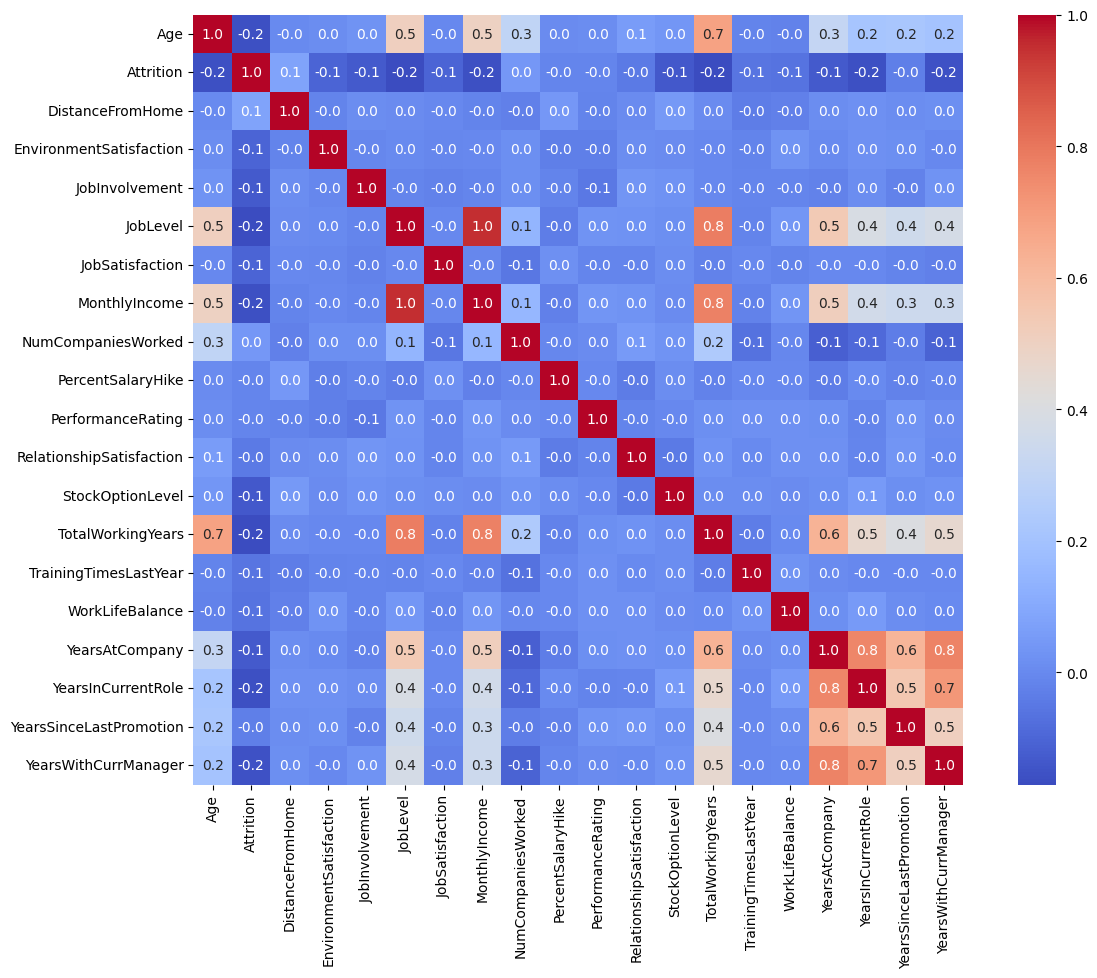

In [204]:
# Heatmap to easily identify correlations between numeric features
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, cbar=True)

It is seen that job level is the most strongly correlated with monthly salary (0.95), with total years worked (0.77) and, to some degree, age (0.50). It appears that attrition, which we are also interested in, has weak correlation with many variables, and none are signficant.

Examining the normality of relevant variables and Testing for homosceasticity are not necessary for logistic regression because they are used for linear regression.  In terms of assessing and mitigating collinearity among variables, even though it is shown that no variable is correlated more than |-0.2| with Attrition, we will perform Variance Inflation Factor Test to quantify the multicollinearity of predictors.

In [205]:
features = data[['JobLevel', 'MonthlyIncome', 'TotalWorkingYears', 'Age']]
features_with_const = sm.add_constant(features)

vif_data = pd.DataFrame()
vif_data['Feature'] = features_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(features_with_const.values, i) for i in range(features_with_const.shape[1])]

print(vif_data)

             Feature        VIF
0              const  23.660642
1           JobLevel  10.956666
2      MonthlyIncome  10.574985
3  TotalWorkingYears   3.639605
4                Age   1.868771


As VIF of over 10 is problematic, Job Level will be removed, as it is highly correlated with Monthly Income.  We will test this new dataset in training.

In [206]:
data = data.drop('JobLevel', axis = 1)

In [207]:
features = data[['MonthlyIncome', 'TotalWorkingYears', 'Age']]
features_with_const = sm.add_constant(features)

vif_data = pd.DataFrame()
vif_data['Feature'] = features_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(features_with_const.values, i) for i in range(features_with_const.shape[1])]

print(vif_data)

             Feature        VIF
0              const  20.938343
1      MonthlyIncome   2.492674
2  TotalWorkingYears   3.490791
3                Age   1.868690


#### Pre-processing

##### Categorical Encoding
In order to be able to use non-numeric categorical data, it must be encoded:

In [208]:
# One Hot encode categorical data
data_encoded = pd.get_dummies(data, columns=['BusinessTravel', 'Gender', 'OverTime', 'EducationField', 'JobRole', 'Department'], drop_first=False)

# Since get_dummies already includes the new encoded columns, you don't need to concatenate
# Just assign the new DataFrame to the original variable
data = data_encoded
print(data.head())

   Age  Attrition  DistanceFromHome  EnvironmentSatisfaction  JobInvolvement  \
0   41          1                 1                        2               3   
1   49          0                 8                        3               2   
2   37          1                 2                        4               2   
3   33          0                 3                        4               3   
4   27          0                 2                        1               3   

   JobSatisfaction  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
0                4           5993                   8                 11   
1                2           5130                   1                 23   
2                3           2090                   6                 15   
3                3           2909                   1                 11   
4                2           3468                   9                 12   

   PerformanceRating  ...  JobRole_Laboratory Technician  JobR

### Logistic Regression Analysis

For predicting attrition, logistic regression will be used, as this target variable is binary.  Lasso regression and Ridge regression will also be tested.  Although no variables are correlated with attrition, the aim is to see if combinations of variables are more strongly correlated with likelihood of attrition.

In [209]:
# Split Data
X = data.drop(columns=['Attrition'])
y = data['Attrition']

# Scale features
scaler = StandardScaler()
# Standardize only the 'MonthlyIncome' column as it is the only continuous numeric column with much variance
X['MonthlyIncome'] = scaler.fit_transform(X[['MonthlyIncome']])

# Train-Test of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [210]:
# Fit the model with regular logistic regression
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [211]:
# Make predictions
y_pred = model.predict(X_test)

In [212]:
# Fit the model with Lasso Logistic Regression (L1 Regularization) and make predictions
lasso = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Logistic Regression with Ridge Logistic Regression (L2 Regularization)
ridge = LogisticRegression(penalty='l2', max_iter=10000)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

#### Evaluation: Approach 1
Logistic Regression, Ridge Regression, and Lasso Regression will be evaluated and compared

In [213]:
# Evaluate the regular logistic regression model
print("Logistic Regression Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Sensitivity (Recall):", recall_score(y_test, y_pred))

# Evaluate Lasso model
print("\nLasso Logistic Regression (L1) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lasso))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lasso))

#Evaluate Ridge model
print("\nRidge Logistic Regression (L2) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_ridge))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ridge))

Logistic Regression Results:
Confusion Matrix:
 [[241   4]
 [ 28  21]]
Accuracy: 0.891156462585034
Precision: 0.84
Sensitivity (Recall): 0.42857142857142855

Lasso Logistic Regression (L1) Results:
Accuracy: 0.891156462585034
Confusion Matrix:
 [[241   4]
 [ 28  21]]

Ridge Logistic Regression (L2) Results:
Accuracy: 0.891156462585034
Confusion Matrix:
 [[241   4]
 [ 28  21]]


Lasso regression produces the same results as ridge regression which gives the same evaluation results as regular logistic regression.  So for this evaluation, any model would work.

Evaluation:
* Accuracy: The models correctly predict 89% of attrition cases, whether an employee has left or is still working at the company.
* Precision: The model predicts that when an employee is no longer working at the company, it is correct 85% of the time (few false positives).
* Sensitivity: At .43, the model does not produce a strong indication of employees who actually leave the company.  There is a higher number of false negatives.

#### Evaluation: Approach 2
Grid Search will be used to find optimal hyperparameters for Logistic Regression

In [214]:
# Build the steps
steps = [("logreg", LogisticRegression(max_iter=10000))]
pipeline = Pipeline(steps)

# Create the parameters
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit the training data
cv.fit(X_train, y_train)

# Print the best cross-validation score
print("Best Cross-Validation Score: ", cv.best_score_)

Best Cross-Validation Score:  0.8886007933645871


In [215]:
print("Best Parameters:", cv.best_params_)

Best Parameters: {'logreg__C': np.float64(0.47421052631578947)}


In [216]:
optimal_model = LogisticRegression(C=0.211, max_iter=5000)
optimal_model.fit(X_train, y_train)

LogisticRegression(C=0.211, max_iter=5000)

In [217]:
y_pred = optimal_model.predict(X_test)
# Confusion Matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[243   2]
 [ 29  20]]


The optimized-parameter model performed very similarly to the original logistic regression models.

#### ROC Curve and Area-Under-Curve (AUC)

This visualization plots the True Positive Rate against the False Positive Rate, showing how well the best model captures positive instances.

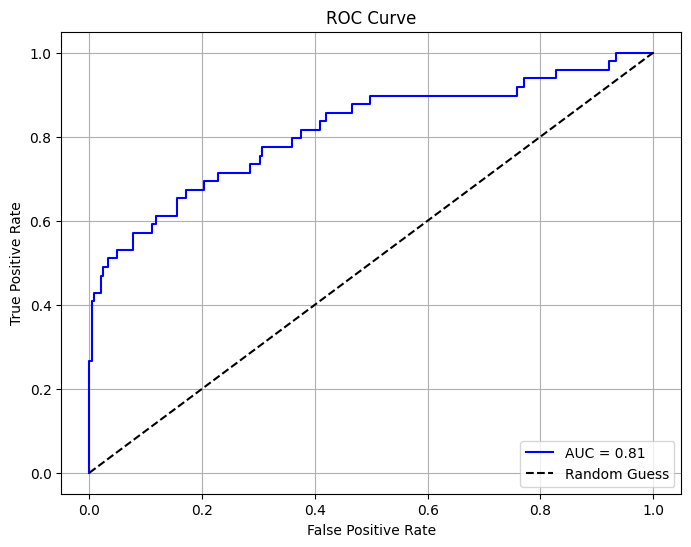

In [218]:
y_probs = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")  # Diagonal line for random chance
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

The AUC value of 0.81 is considered good but not great.  This means that 81% of time the model ranks a randomly chosen value higher than a randomly chosen negative instance value.

### Non-Parametric Statistics

#### Decision Tree
This algorithm can be tested and compared to logistic regression

In [219]:
# Fit training data
tree = DecisionTreeClassifier().fit(X_train, y_train)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [220]:
# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Sensitivity (Recall):", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7653061224489796
Precision: 0.3333333333333333
Sensitivity (Recall): 0.40816326530612246
Confusion Matrix:
 [[205  40]
 [ 29  20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       245
           1       0.33      0.41      0.37        49

    accuracy                           0.77       294
   macro avg       0.60      0.62      0.61       294
weighted avg       0.79      0.77      0.77       294



In [221]:
# Predictions for the test set
y_pred = cv.predict(X_test)

# Classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       245
           1       0.84      0.43      0.57        49

    accuracy                           0.89       294
   macro avg       0.87      0.71      0.75       294
weighted avg       0.89      0.89      0.88       294



The decision tree algorithm shows similar results to the logistic regression algorithms: accuracy of 0.90 and a struggling recall with attrition, showing a high proportion of false negatives and false positives to true negatives.  So we can conclude that this model does not provide an effective prediction for attrition.

We can look further into what features have the most influence on determining attrition by look at importance feature values:

In [222]:
# Create a DataFrame for features and respective importance in Decision Tree
X = pd.DataFrame(X, columns=data.drop(columns=['Attrition']).columns)
features = X.columns.tolist()

In [223]:
importances = tree.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances

,Feature,Importance
5,MonthlyIncome,0.143763
0,Age,0.082969
1,DistanceFromHome,0.079285
10,StockOptionLevel,0.070668
11,TotalWorkingYears,0.068481
24,OverTime_Yes,0.065148
3,JobInvolvement,0.053272
17,YearsWithCurrManager,0.045464
2,EnvironmentSatisfaction,0.037629
13,WorkLifeBalance,0.036408


The importance values represent the percentage of contribution to the decision-making process in this model. It can be seen that monthly income is the most important feature for determining attrition, followed by distance from home, having no overtime, age, and years at the company. 

Pruning the decision tree can help prevent overfitting and improve accuracy on new data.  This can be done by adjusting hyperparameters.  We will prune the decision tree to only include features that have an importance level > 0.03.

In [224]:
important_features = feature_importances[feature_importances['Importance'] > 0.03]['Feature'].tolist()
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

pruned_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, ccp_alpha=0.01)
pruned_tree.fit(X_train_reduced, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5, min_samples_leaf=5)

In [225]:
# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall (Sensitivity):", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))  # Adds F1 Score
print("Specificity:", recall_score(y_test, y_pred, pos_label=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.891156462585034
Precision: 0.84
Recall (Sensitivity): 0.42857142857142855
F1 Score: 0.5675675675675675
Specificity: 0.9836734693877551
Confusion Matrix:
 [[241   4]
 [ 28  21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       245
           1       0.84      0.43      0.57        49

    accuracy                           0.89       294
   macro avg       0.87      0.71      0.75       294
weighted avg       0.89      0.89      0.88       294



This pruning improved the precision and recall, showing fewer false positives and more true positives, although recall is still not good.

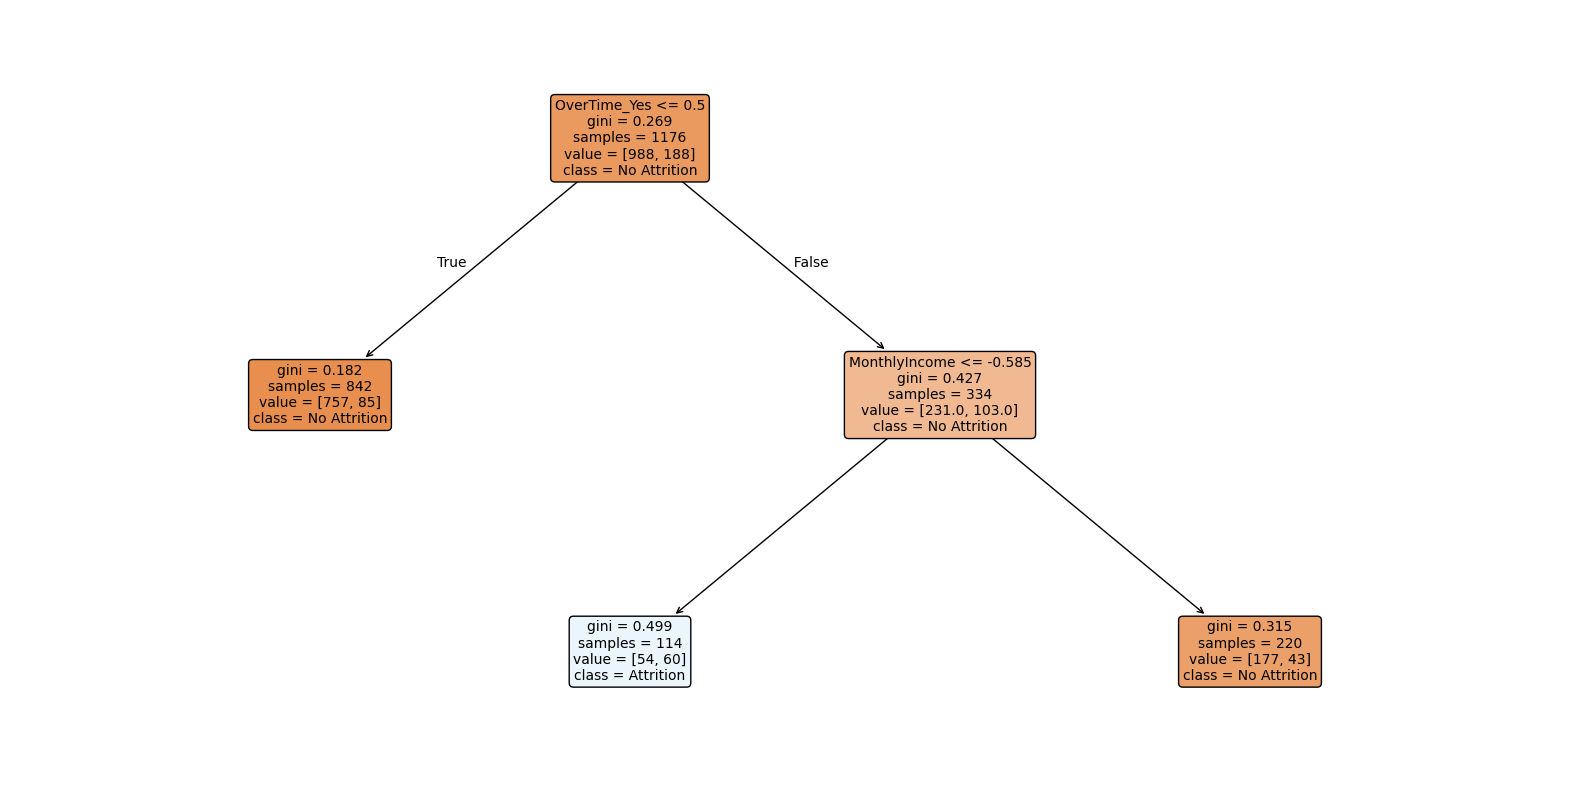

In [226]:
# Visualize the pruned decision tree
plt.figure(figsize=(20, 10))  
plot_tree(
    pruned_tree,                 
    feature_names=important_features,  
    class_names=['No Attrition', 'Attrition'],  
    filled=True,                 
    rounded=True,                
    fontsize=10                 
)
plt.show()

#### Principal Components Analysis

PCA is used for dimensionality reduction.  As we have 43 feature variables after creating dummies for the categorical features, this will help work with a lower dimensional dataset while retaining the most important information.  This can allow for more efficient further data analysis.  The relevant data features have already been normalized. 

In [227]:
# Create covariance matrix to see how pairs of features change together (each pair of dimensions in the dataset)
data = pd.DataFrame(X, columns = features)
cov_mat = data.cov()

# Transpose the covarience matrix
cov_mat = cov_mat.transpose()

# Extract diagonal values
np.var(X, axis=1, ddof=1)

0       42.928588
1       68.749173
2       36.953186
3       29.624736
4       21.160321
          ...    
1465    50.265725
1466    41.814082
1467    25.892779
1468    65.102313
1469    30.544721
Length: 1470, dtype: object

In [228]:
# Calculate eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s'%eig_vecs)
print('\nEigenvalues \n%s'%eig_vals)

Eigenvectors 
[[ 6.65795689e-01 -3.06311260e-02  6.01217358e-01 ...  1.37358920e-17
  -2.95131771e-18 -2.48246157e-18]
 [ 5.34027971e-03  9.98465020e-01  4.79439177e-02 ...  3.03680279e-18
   1.17920345e-18  2.77657056e-18]
 [ 5.26761352e-04 -2.26889445e-03  4.89034306e-04 ... -8.85788872e-17
  -2.79368019e-17 -3.87693666e-17]
 ...
 [ 1.87032367e-04 -3.60563912e-04  7.23496212e-04 ...  2.70353878e-01
  -2.18688521e-02 -3.96164054e-03]
 [ 1.82974915e-04 -5.65881035e-04  2.74405901e-03 ...  2.70353878e-01
  -2.18688521e-02 -3.96164054e-03]
 [-3.70007281e-04  9.26444947e-04 -3.46755522e-03 ...  2.70353878e-01
  -2.18688521e-02 -3.96164054e-03]]

Eigenvalues 
[ 1.41657188e+02  6.57983311e+01  4.90002792e+01  1.50197751e+01
  1.33380241e+01  6.01675220e+00  5.30332348e+00  4.10796009e+00
  3.61819759e+00  1.66013005e+00  1.21710753e+00  1.19071644e+00
  1.16003217e+00  7.18531001e-01  6.61019819e-01  5.28175762e-01
  4.93702539e-01  4.85761712e-01  4.33730122e-01  4.02685065e-01
  3.8577713

In [229]:
# Instantiate a PCA object and perform PCA on the data
pca = PCA() 
X_pca = pca.fit_transform(X)

In [230]:
# Find explained variance ratios for each of the features to use in Scree plot
explained_variance = pca.explained_variance_ratio_

##### Scree Plot
This is used to determine the optimal number of prinipcal components.

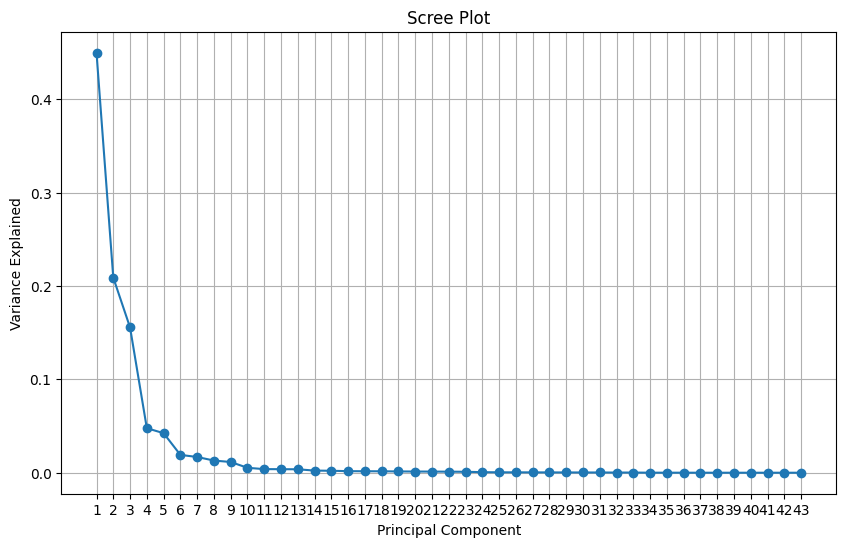

In [231]:
plt.figure(figsize=(10, 6))
plt.plot(
    np.arange(1, len(explained_variance) + 1),
    explained_variance,
    'o-',
)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(np.arange(1, len(explained_variance) + 1))
plt.grid()
plt.show()

It looks like an elbow occurs at 4, and also 4 factors explain about 88% of the variance, so we will use 4 as our number of principal components. 


In [232]:
pca=PCA(n_components=4)
principal_components = pca.fit_transform(X)
principal_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4'])

principal_df

,principal component 1,principal component 2,principal component 3,principal component 4
0,0.437369,-8.497035,3.859168,-2.311248
1,8.926677,-1.206653,3.976645,-9.427959
2,-6.536690,-7.585979,7.928031,1.157638
3,-4.471751,-6.123784,-2.897359,-0.711531
4,-12.018291,-7.241167,-0.587741,3.951665
...,...,...,...,...
1465,1.372009,13.708225,2.448514,6.309302
1466,0.841446,-3.209926,-0.093485,-3.416963
1467,-11.070053,-4.842384,-3.550660,0.730078
1468,12.713768,-7.440753,3.638477,-2.316615


##### Interpretation of PCA


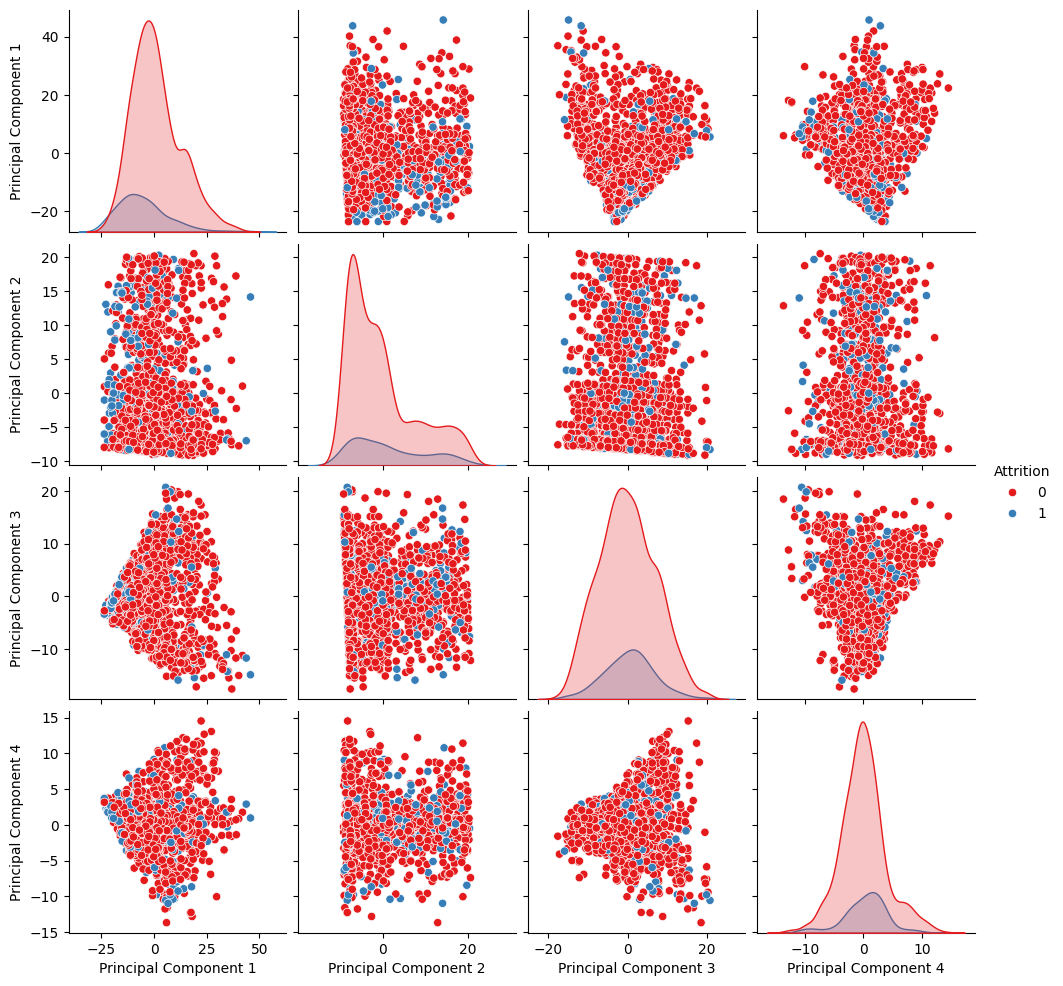

In [233]:
# Create a DataFrame with the Princpial component data
principal_df = pd.DataFrame(data=principal_components, columns=[
    'Principal Component 1', 'Principal Component 2',
    'Principal Component 3', 'Principal Component 4'
])

# Add Attrition back into the dataframe
principal_df = pd.concat([principal_df, y], axis=1)

# Plot pairplot
sns.pairplot(principal_df, hue='Attrition', palette='Set1')
plt.show()

Although it appears that there is some grouping evident for PC1 and PC2, we do not see strong grouping, or any noticeable grouping between other PCs, so the current PCA does not sufficiently capture distinctions between classes.  Alternative methods may be needed to distinguish between classes of attrition.

#### Linear Discriminant Analysis

In an attempt to find a distinction between the Attrition and No Attrition class, LDA will be applied, and log regression retested to see if more effective metrics can be shown.

In [234]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [235]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_train_scaled, y_train)

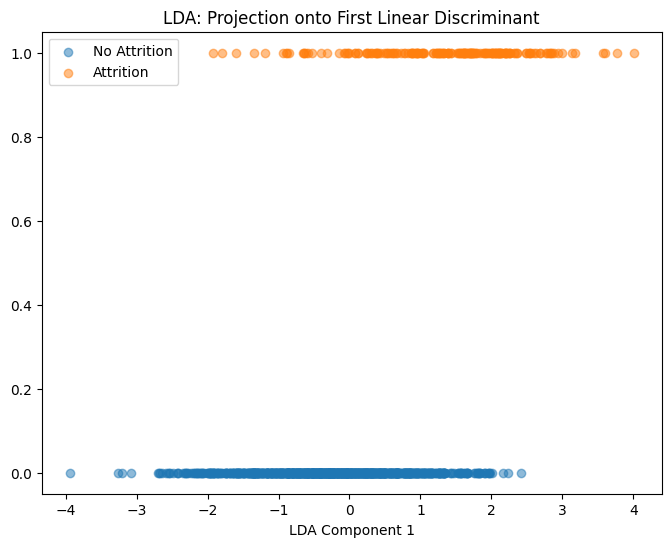

In [236]:
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[y_train == 0], np.zeros((X_lda[y_train == 0].shape[0], 1)), label='No Attrition', alpha=0.5)
plt.scatter(X_lda[y_train == 1], np.ones((X_lda[y_train == 1].shape[0], 1)), label='Attrition', alpha=0.5)
plt.xlabel('LDA Component 1')
plt.title('LDA: Projection onto First Linear Discriminant')
plt.legend()
plt.show()

The visualization shows that although there is signficant x-axis overlap, there is a distinction in where the values cluster (mean values) along the x-axis for Attrition and No Attrition.

In [237]:
# Ensure LDA transformation for both train and test data
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# Initialize and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_lda, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test_lda)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       245
           1       0.80      0.41      0.54        49

    accuracy                           0.88       294
   macro avg       0.85      0.69      0.74       294
weighted avg       0.88      0.88      0.87       294



LDA transformed values offer roughly the same metrics as the original logistic regression models shown earlier, suggesting that LDA did not improve the model.